In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.3 MB/s eta 0:00:00


In [ ]:
pcos_data = pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
pcos_data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


Drop Unnecessary Columns

In [ ]:
pcos_data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
pcos_data.drop(['Sl. No','Patient File No.','Unnamed: 44'], axis=1, inplace=True)

In [ ]:
pcos_data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
pcos_data.select_dtypes('object')

,II beta-HCG(mIU/mL),AMH(ng/mL)
0,1.99,2.07
1,1.99,1.53
2,494.08,6.63
3,1.99,1.22
4,801.45,2.26
...,...,...
536,1.99,1.7
537,1.99,5.6
538,1.99,3.7
539,1.99,5.2


Converting Object Features to Float 

In [ ]:
for i in range(len(pcos_data)):
  if type(pcos_data['AMH(ng/mL)'][i])!=float:
    print(pcos_data['AMH(ng/mL)'][i])
    print(i)

1
8
1
18
1
48
10
107
17
109
21
113
15
117
5
118
19
133
2
147
4
148
9
158
8
175
9
176
32
180
7
207
22
217
12
229
1
249
66
267
21
279
6
291
2
292
10
301
18
303
a
305
1
308
3
310
1
311
1
319
11
321
3
332
3
333
5
349
1
363
15
368
6
372
9
375
2
386
9
392
6
395
15
415
6
425
20
429
8
437
11
440
5
459
7
460
9
461
10
463
6
465
6
466
16
468
12
504
10
515
16
516
1
530
20
540


In [ ]:
pcos_data['AMH(ng/mL)'].value_counts()

1.00    9
2.50    9
4.50    7
1.20    6
4.20    6
       ..
0.45    1
2.53    1
0.29    1
5.67    1
7.60    1
Name: AMH(ng/mL), Length: 301, dtype: int64

In [ ]:
pcos_data['AMH(ng/mL)'].replace({'a':1},inplace=True)

In [ ]:
pcos_data['AMH(ng/mL)'].dtype

dtype('float64')

In [ ]:
pcos_data['II    beta-HCG(mIU/mL)'].value_counts()

1.99      307
2.00        8
15.00       6
12.00       6
1.90        3
         ... 
569.10      1
236.50      1
896.60      1
2.58        1
5.81        1
Name: II    beta-HCG(mIU/mL), Length: 203, dtype: int64

In [ ]:
for i in range(len(pcos_data)):
  if type(pcos_data['II    beta-HCG(mIU/mL)'][i])!=float:
    print(pcos_data['II    beta-HCG(mIU/mL)'][i])
    print(i)

13
23
15
28
12
30
10
31
20
33
1455
35
167
43
10
52
12
53
15
55
12
57
20
63
15
74
15
95
2
113
2
114
2
117
1.99.
123
25000
252
12
325
12
328
12
331
15
333
4176
335
20
339
2
378
2
389
2
401
2
403
2
407
15
462
8
470


In [ ]:
pcos_data['II    beta-HCG(mIU/mL)'].replace({'1.99.':1.99},inplace=True)
pcos_data['II    beta-HCG(mIU/mL)'].dtype

dtype('float64')

In [ ]:
pcos_data.select_dtypes('object')

""
0
1
2
3
4
...
536
537
538
539


Handling Null Values

In [ ]:
pcos_data.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
pcos_data['Fast food (Y/N)'].value_counts()

1.0    278
0.0    262
Name: Fast food (Y/N), dtype: int64

In [ ]:
print(np.where(pcos_data['Fast food (Y/N)'].isna()))
print(np.where(pcos_data['Marraige Status (Yrs)'].isna()))


(array([156]),)
(array([458]),)


In [ ]:
imputer = KNNImputer(n_neighbors=23)
imputed_pcos_data = pd.DataFrame(imputer.fit_transform(pcos_data), columns = pcos_data.columns)
imputed_pcos_data.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
imputed_pcos_data['Fast food (Y/N)'] = np.where(imputed_pcos_data['Fast food (Y/N)']>0.5,1,0)

In [ ]:
imputed_pcos_data['Marraige Status (Yrs)'][458]

6.565217391304348

In [ ]:
imputed_pcos_data['Marraige Status (Yrs)'] = np.around(imputed_pcos_data['Marraige Status (Yrs)'],1)

In [ ]:
pcos_data['Marraige Status (Yrs)'].value_counts()

4.0     52
3.0     51
8.0     48
5.0     47
10.0    44
7.0     43
6.0     38
2.0     29
12.0    29
13.0    24
9.0     17
11.0    16
15.0    14
1.0     13
14.0    12
16.0     8
18.0     7
2.5      7
3.5      7
17.0     6
1.5      5
6.5      4
22.0     2
19.0     2
20.0     2
4.5      2
30.0     2
25.0     2
23.0     2
0.0      1
8.5      1
7.5      1
24.0     1
2.2      1
Name: Marraige Status (Yrs), dtype: int64

In [ ]:
report = sweetviz.analyze(imputed_pcos_data)
report.show_html('pcos_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report pcos_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# imputed_pcos_data[imputed_pcos_data['PCOS (Y/N)']==0]['Pregnant(Y/N)'].value_counts().plot(kind='pie')
# plt.show()
# imputed_pcos_data[imputed_pcos_data['PCOS (Y/N)']==1]['Pregnant(Y/N)'].value_counts().plot(kind='pie')
# plt.show()

#

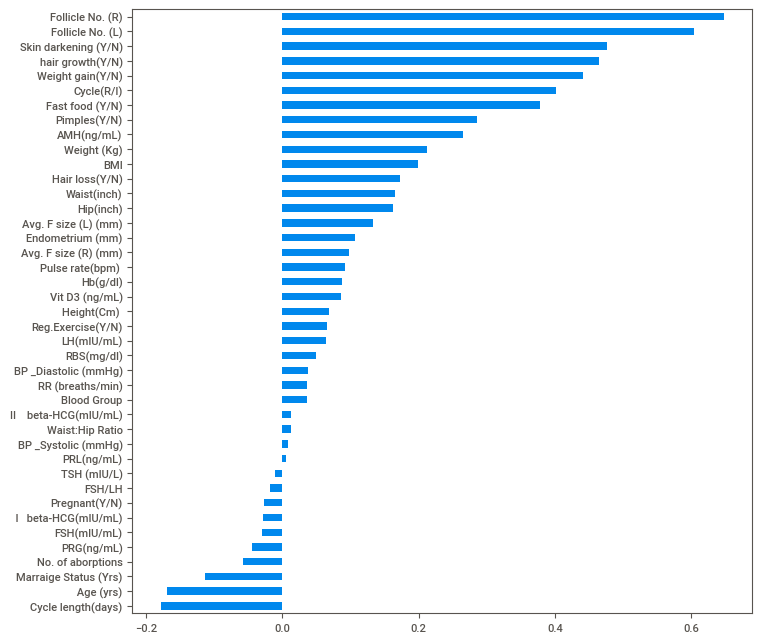

In [ ]:
#imputed_pcos_data.corr()['PCOS (Y/N)'].sort_values().plot(kind='barh')
plt.figure(figsize=(8,8))
(imputed_pcos_data.corr()['PCOS (Y/N)'].sort_values()[:-1]).plot(kind='barh')
plt.savefig('corr_pcos.png')

In [ ]:
imputed_pcos_data.corr('kendall')['PCOS (Y/N)'].sort_values()

Cycle length(days)       -0.228427
 Age (yrs)               -0.155296
Marraige Status (Yrs)    -0.106131
FSH/LH                   -0.096629
FSH(mIU/mL)              -0.094234
Vit D3 (ng/mL)           -0.042283
No. of aborptions        -0.033581
PRG(ng/mL)               -0.031878
Pregnant(Y/N)            -0.027565
BP _Systolic (mmHg)      -0.002755
II    beta-HCG(mIU/mL)    0.009229
TSH (mIU/L)               0.012887
Waist:Hip Ratio           0.015879
PRL(ng/mL)                0.018837
BP _Diastolic (mmHg)      0.031010
LH(mIU/mL)                0.032669
Blood Group               0.033296
RBS(mg/dl)                0.034601
RR (breaths/min)          0.043943
Height(Cm)                0.050756
Reg.Exercise(Y/N)         0.065337
  I   beta-HCG(mIU/mL)    0.066967
Hb(g/dl)                  0.081375
Avg. F size (R) (mm)      0.081484
Avg. F size (L) (mm)      0.095258
Endometrium (mm)          0.101636
Pulse rate(bpm)           0.112447
Hip(inch)                 0.138752
Waist(inch)         

Splitting Data

In [ ]:
x = imputed_pcos_data.drop('PCOS (Y/N)',axis=1)
y = imputed_pcos_data['PCOS (Y/N)']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=3,stratify=y)

Scaling

In [ ]:
imputed_pcos_data.nunique()

PCOS (Y/N)                  2
 Age (yrs)                 29
Weight (Kg)               117
Height(Cm)                 50
BMI                       355
Blood Group                 8
Pulse rate(bpm)            11
RR (breaths/min)            8
Hb(g/dl)                   46
Cycle(R/I)                  3
Cycle length(days)         12
Marraige Status (Yrs)      35
Pregnant(Y/N)               2
No. of aborptions           6
  I   beta-HCG(mIU/mL)    307
II    beta-HCG(mIU/mL)    202
FSH(mIU/mL)               371
LH(mIU/mL)                342
FSH/LH                    512
Hip(inch)                  19
Waist(inch)                23
Waist:Hip Ratio            96
TSH (mIU/L)               308
AMH(ng/mL)                300
PRL(ng/mL)                481
Vit D3 (ng/mL)            331
PRG(ng/mL)                 89
RBS(mg/dl)                 55
Weight gain(Y/N)            2
hair growth(Y/N)            2
Skin darkening (Y/N)        2
Hair loss(Y/N)              2
Pimples(Y/N)                2
Fast food 

In [ ]:
imputed_pcos_data['BP _Diastolic (mmHg)'].value_counts()

80.0     379
70.0     159
60.0       1
8.0        1
100.0      1
Name: BP _Diastolic (mmHg), dtype: int64

In [ ]:
numeric_columns=[]
for i in imputed_pcos_data.columns:
  if imputed_pcos_data[i].nunique()>=5:
    numeric_columns.append(i)

In [ ]:
scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
16,-0.456965,-1.573919,-1.423636,-1.218120,-0.472034,1.785698,0.473537,-0.073367,2.0,0.030173,...,0.0,0,0.0,-0.611674,-1.223175,-0.014366,-0.348923,1.370506,1.338347,-1.291437
417,0.089369,1.084521,0.913881,0.739126,-1.556708,-0.338699,-0.692092,-0.428156,2.0,0.681899,...,1.0,0,1.0,0.688735,0.516165,-0.730441,-0.819968,-0.240757,-0.721141,0.257528
14,0.453592,-0.253930,0.913881,-0.663249,-0.472034,0.192400,1.639166,0.636211,2.0,0.030173,...,1.0,1,0.0,0.688735,0.516165,-0.491749,-1.291014,1.101962,1.632560,-1.336995
210,0.089369,-0.558543,-1.924533,0.306734,-1.556708,-0.338699,-0.692092,-0.428156,4.0,0.030173,...,0.0,1,0.0,0.688735,0.516165,1.417785,2.006306,0.027787,0.749922,-1.063648
78,0.999926,-1.112384,-1.089705,-0.789274,-1.556708,0.457950,0.473537,-1.137734,2.0,0.030173,...,0.0,0,0.0,-0.611674,-1.223175,-1.446517,-1.055491,-4.000371,-1.897992,0.075297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.817815,-0.650850,0.246019,-0.815163,-0.472034,1.254599,1.639166,-0.191630,2.0,0.030173,...,0.0,0,0.0,-0.611674,0.516165,0.224326,-0.348923,-1.852020,-2.486417,2.990995
243,-0.456965,0.272220,-0.755774,0.705872,0.612640,-0.338699,-0.692092,0.399685,2.0,0.681899,...,0.0,1,0.0,0.688735,0.516165,-0.491749,0.122123,-1.314933,-0.132716,0.348644
153,-0.456965,-0.743157,-1.590602,-0.092256,-1.556708,0.192400,-0.692092,0.399685,4.0,-0.621554,...,0.0,0,0.0,-0.611674,0.516165,-0.730441,-0.348923,0.296331,1.044135,-0.198050
221,-0.092742,-2.681603,0.246019,-3.035379,0.612640,1.785698,0.473537,0.991000,4.0,-1.273281,...,0.0,1,0.0,0.688735,-1.223175,0.224326,-0.113400,-0.240757,0.161497,0.713106


In [ ]:
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])
x_test

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
114,-0.456965,1.287597,0.913881,0.939897,0.612640,-0.338699,-0.692092,0.163159,2.0,0.030173,...,0.0,0,1.0,-0.611674,0.516165,1.895169,-0.348923,0.027787,-0.426928,0.120855
266,-1.185410,0.401450,0.079054,0.418369,-1.556708,-0.338699,-0.692092,0.399685,2.0,0.030173,...,1.0,0,0.0,-0.611674,0.516165,-0.730441,-1.055491,1.101962,0.749922,-1.291437
67,0.635703,0.179913,-0.755774,0.596829,1.154977,1.254599,1.639166,-3.148204,2.0,0.030173,...,0.0,0,0.0,-0.611674,0.516165,1.895169,1.299737,-1.852020,-3.074842,-1.336995
265,1.546260,-2.589296,-0.755774,-2.674475,0.612640,-0.338699,0.473537,-1.374260,2.0,-1.273281,...,0.0,1,1.0,0.688735,0.516165,-0.014366,-0.348923,0.833418,0.455710,-0.198050
124,-1.003299,1.656825,0.412985,1.609107,-0.472034,1.254599,0.473537,-0.191630,2.0,0.030173,...,1.0,1,1.0,0.688735,0.516165,0.463018,0.828691,0.296331,0.749922,0.029739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-1.185410,-0.189315,-0.180077,-0.117450,0.070303,-0.338699,-0.692092,-0.428156,2.0,0.030173,...,0.0,0,0.0,0.688735,0.516165,-1.207825,-1.055491,1.101962,0.749922,0.872558
118,0.271481,2.118359,0.913881,1.803869,-0.472034,1.254599,1.639166,-0.191630,2.0,0.030173,...,0.0,1,0.0,-0.611674,0.516165,0.224326,0.593169,0.833418,1.338347,-0.198050
484,-0.092742,0.272220,-0.087912,0.361225,-1.556708,-0.338699,0.473537,-0.428156,2.0,0.030173,...,0.0,1,1.0,0.688735,0.516165,0.701710,0.828691,0.833418,0.455710,-0.539733
23,-0.639076,0.456834,-0.755774,0.923959,-0.472034,0.192400,1.639166,-0.782945,2.0,0.030173,...,1.0,0,0.0,-0.611674,0.516165,-0.014366,0.357646,-0.240757,0.749922,0.029739


Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
def evaluate(model,ind,dep):
  new_pred = model.predict(ind)
  new_accuracy = accuracy_score(dep,new_pred)
  print(new_accuracy)

In [ ]:
print('Training Accuracy')
evaluate(rf_model,x_train,y_train)
print('Testing Accuracy')
evaluate(rf_model,x_test,y_test)

Training Accuracy
1.0
Testing Accuracy
0.908256880733945


In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
print('Training Accuracy')
evaluate(ada_model,x_train,y_train)
print('Testing Accuracy')
evaluate(ada_model,x_test,y_test)

Training Accuracy
0.9837962962962963
Testing Accuracy
0.8532110091743119


In [ ]:
pd.Series(rf_model.feature_importances_,index = x_train.columns).sort_values()

Pregnant(Y/N)             0.002057
BP _Diastolic (mmHg)      0.002438
Reg.Exercise(Y/N)         0.003369
BP _Systolic (mmHg)       0.003665
No. of aborptions         0.003929
Blood Group               0.004851
RR (breaths/min)          0.004872
II    beta-HCG(mIU/mL)    0.006321
Hair loss(Y/N)            0.008132
Pulse rate(bpm)           0.008778
PRG(ng/mL)                0.011131
Waist(inch)               0.011791
  I   beta-HCG(mIU/mL)    0.012162
Hb(g/dl)                  0.012358
Avg. F size (L) (mm)      0.012847
Marraige Status (Yrs)     0.013852
Endometrium (mm)          0.014537
FSH(mIU/mL)               0.015139
RBS(mg/dl)                0.015587
Hip(inch)                 0.017042
Vit D3 (ng/mL)            0.017224
Avg. F size (R) (mm)      0.017960
PRL(ng/mL)                0.018094
 Age (yrs)                0.018662
Pimples(Y/N)              0.019457
TSH (mIU/L)               0.020131
Height(Cm)                0.020493
Weight (Kg)               0.021043
Waist:Hip Ratio     

In [ ]:
non_imp_features = list(pd.Series(rf_model.feature_importances_,index = x_train.columns).sort_values().head(6).index)

In [ ]:
new_x_train = x_train.drop(non_imp_features, axis=1)
new_x_test = x_test.drop(non_imp_features, axis=1)

In [ ]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(new_x_train,y_train)

RandomForestClassifier()

In [ ]:
print('Training Accuracy')
evaluate(rf_model2,new_x_train,y_train)
print('Testing Accuracy')
evaluate(rf_model2,new_x_test,y_test)

Training Accuracy
1.0
Testing Accuracy
0.908256880733945


Hyperparameter Tuning

In [ ]:
para = {'n_estimators':np.arange(30,300,10), 'criterion': ["gini","entropy"], 'max_depth': np.arange(4,25),
        'min_samples_split': np.arange(2,5), 'max_leaf_nodes': np.arange(3,5),
        'oob_score': [True,False],'random_state':np.arange(2,6)}
rscv_model = RandomizedSearchCV(rf_model,para,cv=5)

rscv_model.fit(new_x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                                        'max_leaf_nodes': array([3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150,
       160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280,
       290]),
                                        'oob_score': [True, False],
                                        'random_state': array([2, 3, 4, 5])})

In [ ]:
rscv_model.best_params_

{'random_state': 3,
 'oob_score': True,
 'n_estimators': 150,
 'min_samples_split': 3,
 'max_leaf_nodes': 4,
 'max_depth': 23,
 'criterion': 'gini'}

In [ ]:
print('Training Accuracy')
evaluate(rscv_model,new_x_train,y_train)
print('Testing Accuracy')
evaluate(rscv_model,new_x_test,y_test)

Training Accuracy
0.8842592592592593
Testing Accuracy
0.8899082568807339


In [ ]:
rf_model3 = RandomForestClassifier(random_state= 3,oob_score= False,n_estimators= 60,min_samples_split= 2,
 max_leaf_nodes= 4,max_depth= 5,criterion= 'gini')
rf_model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=4, n_estimators=60,
                       random_state=3)

In [ ]:
print('Training Accuracy')
evaluate(rf_model3,x_train,y_train)
print('Testing Accuracy')
evaluate(rf_model3,x_test,y_test)

Training Accuracy
0.8842592592592593
Testing Accuracy
0.8807339449541285


Neural Networks

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import plot_model

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Input(shape=[41],name='input_layer'))
model.add(keras.layers.Dense(units=20,activation='relu',name='DenseLayer1'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10,activation='relu',name='DenseLayer2'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1,activation='sigmoid',name='OutputLayer'))

In [ ]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4180 sha256=b1c59051da3c0afa2bf8762c88dce0fd458a6770f891a61678f69dbe63bf5e62
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model)

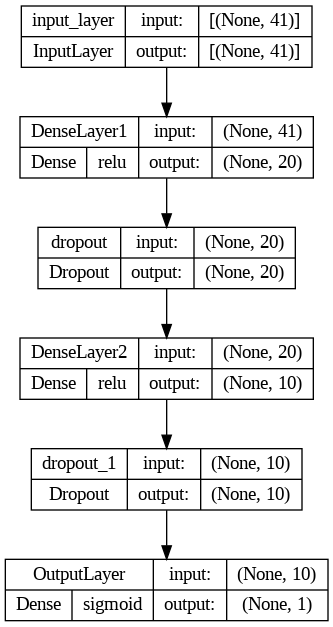

In [ ]:
plot_model(model,show_shapes=True,show_layer_activations=True,show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=25,epochs=50,verbose=True,validation_split=0.1,
                    use_multiprocessing=True,workers=8)

Epoch 1/50
16/16 [==============================] - 6s 19ms/step - loss: 0.7071 - accuracy: 0.5490 - val_loss: 0.6408 - val_accuracy: 0.7045
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6478 - accuracy: 0.6263 - val_loss: 0.6137 - val_accuracy: 0.7045
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.6701 - val_loss: 0.5914 - val_accuracy: 0.6591
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5689 - accuracy: 0.7552 - val_loss: 0.5749 - val_accuracy: 0.6591
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5445 - accuracy: 0.7552 - val_loss: 0.5604 - val_accuracy: 0.7045
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.7629 - val_loss: 0.5503 - val_accuracy: 0.7273
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4998 - accuracy: 0.8015 - val_loss: 0.5371 - val_accuracy: 0.7045
Epoch 8/50
16/16 [=

Model Evaluation

In [ ]:
history.history['accuracy']
history.history['val_accuracy']

[0.7045454382896423,
 0.7045454382896423,
 0.6590909361839294,
 0.6590909361839294,
 0.7045454382896423,
 0.7272727489471436,
 0.7045454382896423,
 0.6818181872367859,
 0.75,
 0.75,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7954545617103577,
 0.7954545617103577,
 0.7272727489471436,
 0.75,
 0.75,
 0.75,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.75,
 0.75,
 0.7727272510528564,
 0.7727272510528564,
 0.7727272510528564,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7727272510528564,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7727272510528564,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577,
 0.7954545617103577]

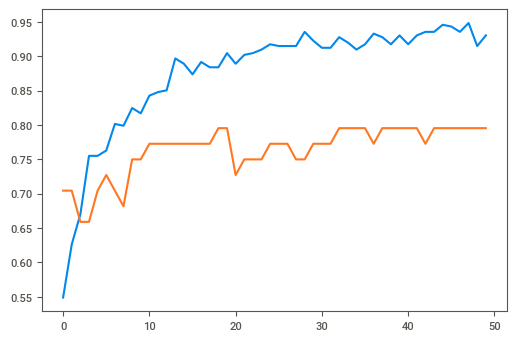

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
pred = model.predict(x_test).round(2)
y_pred = np.where(pred>0.5,1,0)
print(y_pred)

4/4 [==============================] - 0s 4ms/step
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

0.926605504587156
[[68  5]
 [ 3 33]]


In [ ]:
x_test[4:5]

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
124,-1.003299,1.656825,0.412985,1.609107,-0.472034,1.254599,0.473537,-0.19163,2.0,0.030173,...,1.0,1,1.0,0.688735,0.516165,0.463018,0.828691,0.296331,0.749922,0.029739


In [ ]:
new_pred = model.predict([x_test[4:5]])
new_pred

1/1 [==============================] - 0s 109ms/step


array([[0.99293125]], dtype=float32)

In [ ]:
y_test[4:5]

124    1.0
Name: PCOS (Y/N), dtype: float64

Feature Selection

In [ ]:
for i in range(len(x.columns)):
  vif = variance_inflation_factor(x.values,i)
  print(x.columns[i],vif)

 Age (yrs) 71.51374054976442
Weight (Kg) 4048.986714840635
Height(Cm)  16539.62981811663
BMI 4053.600151028556
Blood Group 61.82607730554987
Pulse rate(bpm)  317.3345475081767
RR (breaths/min) 159.15432553848078
Hb(g/dl) 185.90102767830447
Cycle(R/I) 12.113069430559602
Cycle length(days) 13.64730069218125
Marraige Status (Yrs) 7.29863843492066
Pregnant(Y/N) 1.9106199626893352
No. of aborptions 1.405659596152341
  I   beta-HCG(mIU/mL) 1.5677888145667618
II    beta-HCG(mIU/mL) 1.5058917347771217
FSH(mIU/mL) 19.681915275879334
LH(mIU/mL) 1.0419138586768362
FSH/LH 19.843750287706552
Hip(inch) 16269.59149830001
Waist(inch) 15968.954523918586
Waist:Hip Ratio 16592.29048867737
TSH (mIU/L) 1.7286476074371646
AMH(ng/mL) 2.3171862521000683
PRL(ng/mL) 3.868759607600503
Vit D3 (ng/mL) 1.0681600154599487
PRG(ng/mL) 1.0841313775674484
RBS(mg/dl) 32.72418905739296
Weight gain(Y/N) 2.8201580231308636
hair growth(Y/N) 1.9391084690199971
Skin darkening (Y/N) 2.065034869404499
Hair loss(Y/N) 2.3529905751

In [ ]:
vif

18.31179581925074

In [ ]:
#feature selection (filter) -> DL model

#ML model
#feature selection(wrapper and embedded)

#compare results

In [ ]:
print(imputed_pcos_data.shape)
print(imputed_pcos_data['PCOS (Y/N)'].value_counts())
print(imputed_pcos_data['PCOS (Y/N)'].value_counts(normalize=True))

(541, 42)
0.0    364
1.0    177
Name: PCOS (Y/N), dtype: int64
0.0    0.672828
1.0    0.327172
Name: PCOS (Y/N), dtype: float64


In [ ]:
smote= SMOTE(0.6,k_neighbors=23)
smote_x,smote_y = smote.fit_resample(x,y)

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.6 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
print(smote_y.shape)
print(smote_y.value_counts())

(582,)
0.0    364
1.0    218
Name: PCOS (Y/N), dtype: int64


In [ ]:
smote_x_train,smote_x_test,smote_y_train,smote_y_test = train_test_split(smote_x,smote_y,random_state=3,train_size=0.8,stratify=smote_y)

In [ ]:
scaler = StandardScaler()
smote_x_train[numeric_columns] = scaler.fit_transform(smote_x_train[numeric_columns])
smote_x_train

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
518,-1.356792,-0.374835,-0.437520,-0.212254,1.732882,-0.352033,-0.721066,-0.791768,2.0,0.058604,...,0.0,0,0.000000,-0.633667,-1.236645,-0.310246,-0.644039,1.098626,1.354689,-1.204011
12,-1.172683,1.311026,-0.777675,1.943576,1.732882,-0.352033,-0.721066,0.620199,4.0,-1.922228,...,1.0,1,1.000000,0.698267,0.533207,2.020804,0.267007,1.372093,1.654524,-0.235064
459,0.852515,-0.468493,-0.437520,-0.314558,-0.466715,0.194929,-0.721066,-1.380087,2.0,0.058604,...,0.0,1,0.000000,-0.633667,0.533207,-0.543351,-1.327324,1.919028,-0.444326,0.918444
11,-0.988574,-1.030447,0.582947,-1.352787,-0.466715,-0.352033,0.470490,-1.968407,2.0,0.058604,...,0.0,0,0.000000,0.698267,0.533207,-0.543351,-1.099562,0.825159,1.054853,-0.327345
230,1.588950,1.030049,-0.777675,1.611477,0.633083,-0.352033,-0.721066,2.385157,2.0,0.058604,...,0.0,1,0.000000,0.698267,0.533207,-0.543351,-1.099562,0.551692,-1.643669,1.610549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.484297,-1.405082,-1.117831,-1.132993,1.732882,-0.898994,-0.721066,-0.556440,2.0,0.058604,...,0.0,0,0.000000,-0.633667,0.533207,-0.310246,-0.644039,0.825159,0.155346,-1.434712
172,-0.068030,-0.936788,-1.287908,-0.488090,-0.466715,0.468409,-0.721066,-0.909432,2.0,0.718881,...,1.0,0,1.000000,0.698267,0.533207,-0.776456,-1.099562,-0.268710,-1.043997,-1.388572
440,-0.988574,-0.374835,0.582947,-1.056265,-1.566513,-0.898994,0.470490,-0.085785,2.0,0.718881,...,0.0,1,1.000000,-0.633667,-1.236645,0.622174,-0.188516,1.098626,-0.444326,-0.235064
581,-0.708536,-0.053880,0.820166,-0.411729,-0.513006,-0.352033,-0.100211,0.485800,2.0,0.718881,...,0.0,1,0.521045,0.698267,0.533207,-0.178976,0.177093,0.574713,0.911245,0.245760


In [ ]:
smote_x_test[numeric_columns] = scaler.transform(smote_x_test[numeric_columns])
smote_x_test

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
181,-0.252139,-0.093858,1.892545,-0.882589,-0.466715,-0.078552,0.470490,3.091140,2.0,0.058604,...,0.0,1,1.0,2.030200,0.533207,2.020804,2.089100,-0.542177,-0.444326,0.364760
0,-0.620356,-1.442546,-0.777675,-1.312026,0.633083,1.288851,1.662046,-0.815301,2.0,0.058604,...,0.0,1,0.0,-0.633667,0.533207,-0.776456,-0.871801,0.825159,0.755017,-0.004362
246,-0.988574,-0.562152,1.093180,-1.050014,0.633083,0.194929,0.470490,-1.380087,2.0,0.058604,...,0.0,1,1.0,0.698267,-1.236645,-1.242666,-1.099562,-0.268710,0.155346,-0.235064
342,0.116079,-1.873377,0.242791,-2.156036,0.633083,1.288851,1.662046,0.031879,2.0,0.058604,...,1.0,1,0.0,-0.633667,0.533207,-0.543351,1.861339,0.004757,-1.043997,1.149146
306,1.773059,-1.873377,-0.267442,-2.002580,-0.466715,-0.352033,-1.912622,-0.203449,2.0,0.058604,...,1.0,0,0.0,-0.633667,-1.236645,0.389069,1.178054,-1.089111,-1.193915,-1.388572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.116079,-1.873377,-0.097364,-2.044383,0.633083,1.288851,1.662046,-0.791768,2.0,0.058604,...,0.0,0,0.0,-0.633667,0.533207,-0.310246,0.267007,-0.268710,-0.444326,-0.558046
33,1.220733,-0.562152,1.433335,-1.175267,0.633083,-0.352033,-0.721066,-1.144760,2.0,0.058604,...,0.0,0,0.0,0.698267,0.533207,-1.009561,-0.416277,-0.268710,-1.043997,-0.004362
371,-0.068030,0.749072,0.753024,0.452724,0.633083,-0.352033,-0.721066,1.914501,2.0,0.718881,...,1.0,1,0.0,-0.633667,0.533207,-0.543351,0.494769,-0.815644,0.455181,0.226339
114,-0.436248,1.311026,0.923102,0.963459,0.633083,-0.352033,-0.721066,0.149543,2.0,0.058604,...,0.0,0,1.0,-0.633667,0.533207,1.787699,-0.416277,0.004757,-0.444326,0.087918


In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Input(shape=[41],name='input_layer'))
model.add(keras.layers.Dense(units=20,activation='relu',name='DenseLayer1'))
model.add(keras.layers.Dense(units=10,activation='relu',name='DenseLayer2'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=6,activation='relu',name='DenseLayer3'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=1,activation='sigmoid',name='OutputLayer'))

In [ ]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model)

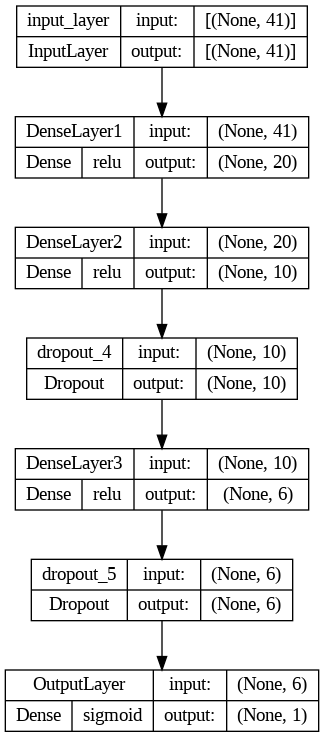

In [ ]:
plot_model(model,show_shapes=True,show_layer_activations=True,show_layer_names=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(smote_x_train,smote_y_train,batch_size=25,epochs=50,verbose=True,validation_split=0.1,
                    use_multiprocessing=True,workers=8)

Epoch 1/50
17/17 [==============================] - 3s 33ms/step - loss: 0.7072 - accuracy: 0.6483 - val_loss: 0.7362 - val_accuracy: 0.5106
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6697 - accuracy: 0.6411 - val_loss: 0.6814 - val_accuracy: 0.5532
Epoch 3/50
17/17 [==============================] - 0s 12ms/step - loss: 0.6034 - accuracy: 0.6651 - val_loss: 0.6466 - val_accuracy: 0.5957
Epoch 4/50
17/17 [==============================] - 0s 16ms/step - loss: 0.5599 - accuracy: 0.6986 - val_loss: 0.6143 - val_accuracy: 0.6383
Epoch 5/50
17/17 [==============================] - 0s 13ms/step - loss: 0.5392 - accuracy: 0.7177 - val_loss: 0.5783 - val_accuracy: 0.7872
Epoch 6/50
17/17 [==============================] - 0s 19ms/step - loss: 0.5156 - accuracy: 0.7416 - val_loss: 0.5452 - val_accuracy: 0.8298
Epoch 7/50
17/17 [==============================] - 0s 25ms/step - loss: 0.4855 - accuracy: 0.7847 - val_loss: 0.5122 - val_accuracy: 0.8723
Epoch 8/50
17

Model Evaluation

In [ ]:
history.history['accuracy']
history.history['val_accuracy']

[0.5106382966041565,
 0.5531914830207825,
 0.5957446694374084,
 0.6382978558540344,
 0.7872340679168701,
 0.8297872543334961,
 0.8723404407501221,
 0.8510638475418091,
 0.914893627166748,
 0.957446813583374,
 0.936170220375061,
 0.936170220375061,
 0.914893627166748,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.957446813583374,
 0.957446813583374,
 0.957446813583374,
 0.957446813583374,
 0.957446813583374,
 0.957446813583374,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.914893627166748,
 0.914893627166748,
 0.936170220375061,
 0.914893627166748,
 0.936170220375061,
 0.914893627166748,
 0.936170220375061,
 0.957446813583374,
 0.957446813583374,
 0.957446813583374,
 0.936170220375061,
 0.936170220375061,
 0.936170220375061,
 0.914893627166748,
 0.957446813583374,
 0.936170220375061,
 0.936170220

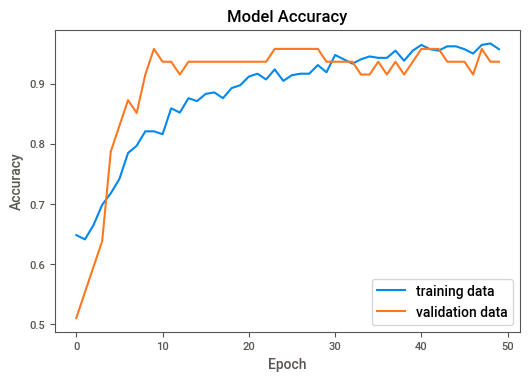

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(["training data","validation data"])
plt.savefig('pcos_graph.png')

In [ ]:
pred = model.predict(smote_x_test).round(2)
y_pred = np.where(pred>0.5,1,0)
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [ ]:
accuracy = accuracy_score(smote_y_test,y_pred)
print(accuracy)
matrix = confusion_matrix(smote_y_test,y_pred)
print(matrix)

0.8461538461538461
[[61 12]
 [ 6 38]]
